## LinearRegression Class Implementation

In [834]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors = []
        
    def mse(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted)**2)
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            self.errors.append(mse(y, y_predicted))
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

## Loading & Splitting Dataset

In [859]:
import pandas as pd
import math
import matplotlib.pyplot as plt

def train_test_split(X, Y):
    dataset_length = len(Y)
    test_size = 0.2
    train_length = math.ceil(dataset_length * (1 - test_size))
    print(train_length)
    return X[:train_length], X[train_length:], Y[:train_length], Y[train_length:]

df = pd.read_csv('house_data.csv')

X = np.array(df[['sqft_living']])
Y = np.array(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, Y)

17291


## Plotting The Original Dataset

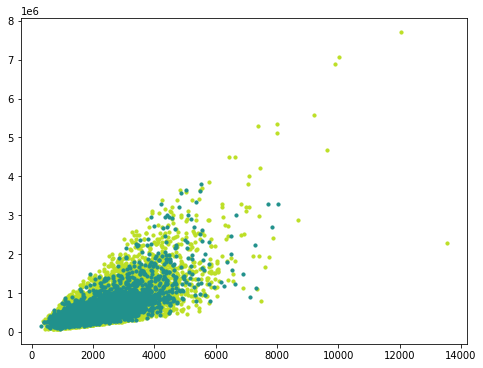

In [836]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.show()

## Training & Testing The Model

In [837]:
regressor = LinearRegression(lr=0.0000001)
regressor.fit(X_train, y_train)

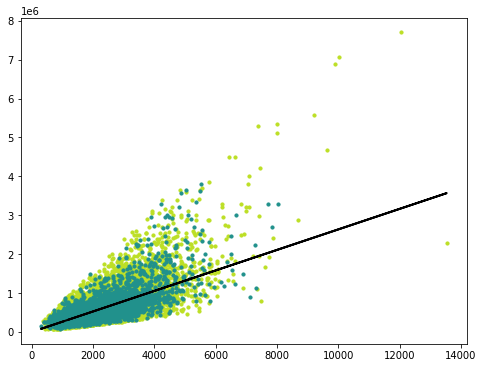

In [838]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()

## Errors for all iterations in gradient descent 

In [839]:
print(regressor.errors)

print("MSE = %s" % regressor.errors[-1])

[418238411733.69495, 154609001972.7967, 89659965449.38551, 73658801728.28697, 69716676415.61493, 68745475047.34431, 68506205097.191605, 68447257366.945465, 68432734704.65945, 68429156820.36186, 68428275345.337616, 68428058170.948555, 68428004656.92744, 68427991463.0786, 68427988202.70547, 68427987389.59222, 68427987179.39793, 68427987117.741714, 68427987092.68009, 68427987076.63407, 68427987062.80919, 68427987049.53153, 68427987036.38866, 68427987023.279015, 68427987010.17757, 68427986997.0781, 68427986983.97918, 68427986970.88034, 68427986957.78155, 68427986944.682755, 68427986931.58396, 68427986918.48519, 68427986905.3864, 68427986892.28762, 68427986879.18884, 68427986866.090065, 68427986852.99128, 68427986839.89249, 68427986826.79369, 68427986813.694916, 68427986800.596146, 68427986787.49737, 68427986774.39859, 68427986761.29982, 68427986748.20103, 68427986735.10225, 68427986722.00347, 68427986708.90469, 68427986695.80592, 68427986682.70713, 68427986669.60835, 68427986656.50958, 684

## Predictions on new data (testing the model)

In [840]:
predicted = regressor.predict(X_test)

In [841]:
print(predicted)

[598244.20534915 387408.99578296 337335.63351099 ... 268814.19040198
 421669.71733747 268814.19040198]


## Testing different learning rates

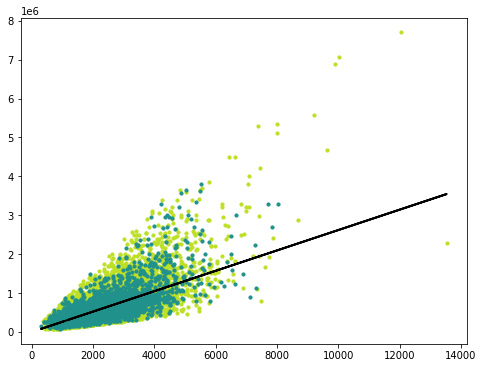

MSE = 68442526059.064964


In [842]:
regressor_test_1 = LinearRegression(lr=0.000000001)
regressor_test_1.fit(X_train, y_train)

y_pred_line = regressor_test_1.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()


print("MSE = %s" % regressor_test_1.errors[-1])

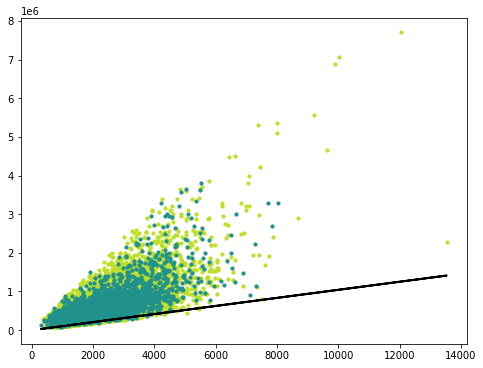

MSE = 196276794325.15506


In [843]:
regressor_test_2 = LinearRegression(lr=0.0000000001)
regressor_test_2.fit(X_train, y_train)

y_pred_line = regressor_test_2.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()


print("MSE = %s" % regressor_test_2.errors[-1])

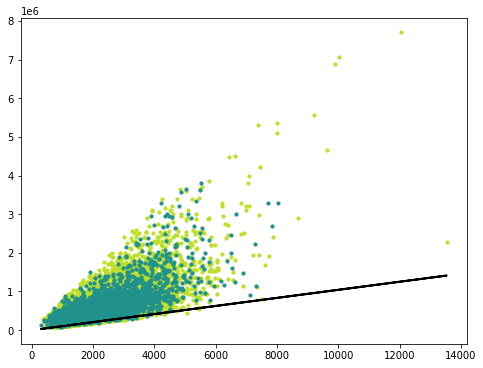

MSE = 384749733306.9576


In [844]:
regressor_test_3 = LinearRegression(lr=0.00000000001)
regressor_test_3.fit(X_train, y_train)

y_pred_line = regressor_test_2.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()


print("MSE = %s" % regressor_test_3.errors[-1])

## MultiLinearRegression Class Implementation

In [863]:
import numpy as np

class MultiLinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors = []
        
    def mse(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted)**2)
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.weights = self.weights.reshape(self.weights.shape[0], 1)
        self.bias = 0
        
        for _ in range(self.n_iters):
            
            y_predicted = self.bias
            y_predicted += np.dot(X, self.weights)
            y_predicted = y_predicted.reshape(y_predicted.shape[0], 1)
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            self.errors.append(mse(y, y_predicted))
            
    def predict(self, X):
        y_predicted = self.bias
        y_predicted += np.dot(X, self.weights)
            
        return y_predicted

## Loading & Splitting Dataset

In [864]:
X = np.array(df[['grade', 'bathrooms', 'lat', 'sqft_living', 'view']])
Y = np.array(df['price'])

Y = Y.reshape(Y.shape[0], 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y)

17291


## Training & Testing The Model

In [865]:
multi_regressor = MultiLinearRegression(lr=0.0000001)
multi_regressor.fit(X_train, y_train)

## Errors for all iterations in gradient descent 

In [866]:
print(multi_regressor.errors)

print("MSE = %s" % multi_regressor.errors[-1])

[418238411733.69495, 154544010791.28915, 89630065238.28946, 73650110440.0169, 69716286870.90913, 68747871914.68674, 68509454672.08984, 68450741724.8862, 68436266771.89152, 68432681933.32271, 68431777927.04608, 68431533865.569115, 68431452264.92292, 68431410658.96304, 68431378900.07167, 68431349566.77832, 68431320832.131874, 68431292246.38968, 68431263698.83808, 68431235162.22238, 68431206629.83325, 68431178100.01887, 68431149572.37252, 68431121046.79394, 68431092523.258354, 68431064001.75956, 68431035482.29586, 68431006964.8668, 68430978449.47211, 68430949936.11162, 68430921424.78515, 68430892915.49257, 68430864408.233734, 68430835903.008484, 68430807399.816666, 68430778898.65812, 68430750399.53271, 68430721902.44027, 68430693407.38068, 68430664914.35374, 68430636423.35934, 68430607934.397316, 68430579447.467514, 68430550962.56978, 68430522479.70398, 68430493998.86992, 68430465520.06749, 68430437043.296524, 68430408568.55691, 68430380095.848434, 68430351625.17096, 68430323156.52436, 68

## Predictions on new data (testing the model)

In [872]:
predicted = multi_regressor.predict(X_test)

print(mse(y_test, predicted))

69590621090.38869


### Testing different learning rates

In [874]:
multi_regressor_test_1 = MultiLinearRegression(lr=0.000000001)
multi_regressor_test_1.fit(X_train, y_train)
predicted = multi_regressor_test_1.predict(X_test)

print(mse(y_test, predicted))

69577357614.54689


In [875]:
multi_regressor_test_2 = MultiLinearRegression(lr=0.0000000001)
multi_regressor_test_2.fit(X_train, y_train)
predicted = multi_regressor_test_2.predict(X_test)

print(mse(y_test, predicted))

210392649584.95905


In [884]:
multi_regressor_test_3 = MultiLinearRegression(lr=0.0000002)
multi_regressor_test_3.fit(X_train, y_train)
predicted = multi_regressor_test_3.predict(X_test)

print(mse(y_test, predicted))

69581766940.14935
